## Final project for P2:
## What factors will affect the survival rate of passengers on Titanic?

# 1.The ticket class

The first question will be: Does the ticket class affect the survival rate? There are three types of ticket classes on Titanic: 1st, 2nd and 3rd. As we know, the 1st class is near the deck while the 3rd class is close to the bottom. So theoretically, people in 1st class will have better change to be saved. Therefore, we can make a hypothesis: People in 1st class had higher survival rate than people in 3rd class.

To test the hypothesis, we need to open the raw data first:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv('titanic-data.csv')

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Then make a function to do these things: 
1. Calculate survival rate of different groups and print them.
2. Make a bar chart to compare survival rate visually.
3. Perform a Chi-square test to test whether the difference of survival rate is statistically significant (confidence level is 0.05).

In [3]:
def compare_survival_rate (name):
    data.groupby(name)['Survived'].mean().plot(kind='bar')
    print('survival rates are:\n',data.groupby(name)['Survived'].mean())
    plt.ylabel('Survival Rate')
    plt.xlabel(name)
    plt.title('Survival Rate by ' + name) 
    test = stats.chi2_contingency(pd.crosstab(data['Survived'], data[name]))
    if test[1] < 0.05:
        print('p value is',test[1],',the difference is statistically significant')
    else:
        print('p value is',test[1],',the difference is not statistically significant')

Call the function to study the relationship between ticket class and survival.

survival rates are:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
p value is 4.549251711298793e-23 ,the difference is statistically significant


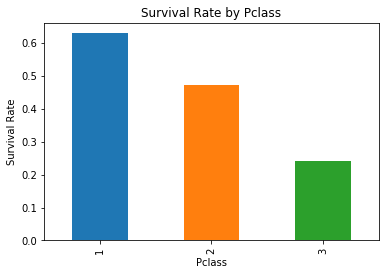

In [4]:
compare_survival_rate ('Pclass')

The conclusion is: These data show that the survival of the sample of people on Titanic was statistically significantly associated with their ticket class (p = 4.549251711298793e-23). People in 1st class had the highest survival rate (about 63.0%). The survival rate of people in 2nd class was lower (about 47.3%). Finally, only about 24.2% of people in 3rd class survived that shipwreck.

# 2. Gender

In movie Titanic, we have seen that many gentlemen had given up their chance to be saved to let women board lifeboats first. Is that the truth or just a film action? If it is true, we can make a hypothesis: The survival rate of wowen is significantly higher than that of men. To test the hypothesis, I call the previously made function to study the relationship between gender and survival.

survival rates are:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
p value is 1.1973570627755645e-58 ,the difference is statistically significant


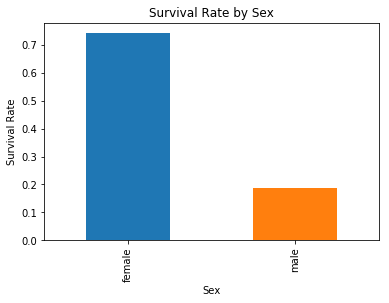

In [5]:
compare_survival_rate ('Sex')

The conclusion is: These data show that the survival of the sample of people on Titanic was statistically significantly associated with their gender (p = 1.1973570627755645e-58). Females have higher survival rate (74.2%), while males' survival rate is much lower, which is only 18.9%.

# 3. Age

Age is another factor which may affect survival rate. On the one hand, children and old people may be too clumsy to escape from the sinking ship. On the other hand, they may receive more attention from gentlemen and get better chances to board lifeboats. Here, I will not put forward any hypotheses. Instead, I will explore the data step by step. 

First, I need to exam the age data by survival groups.

In [6]:
data.groupby('Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


The mean age of survivor group is 28.3, which is younger than the age of victim group (30.6). However, the median age of two group is the same, which is 28.0. Let's treat age as a continuous variable first. The best way is to conduct a t-test to compare the means of age of two groups to see whether their means are signigicantly different. But before that, we need to exam the normality of the age sample.

Let's conduct a kernel density estimation and make a density plot to see whether the distribution of age is normal.

Text(0.5,1,'Density Plot of Age')

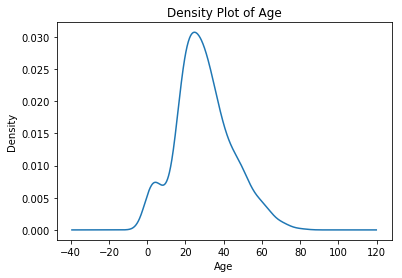

In [7]:
data['Age'].plot(kind='kde')
plt.xlabel('Age')
plt.title('Density Plot of Age') 

If the distribution of age is normal, the shape of plot should be bell-like. But the shape seems not strictly bell-like. It is more likely positively skewed. To confirm, we run a normal test:

In [8]:
stats.normaltest(data['Age'][pd.notna(data['Age'])])

NormaltestResult(statistic=18.105032952089758, pvalue=0.00011709599657350757)

The pvalue is 0.0001. If we set the confidence level 0.05, the null hypothesis can be rejected, which means the distribution of age is not normal.Therefore, it's better to use Wilcoxon rank-sum test rather than t-test.

In [9]:
stats.ranksums(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 0]['Age'])

RanksumsResult(statistic=-3.288931503928799, pvalue=0.0010056849511404726)

The pvalue is 0.001. If we set the confidence level 0.05, the null hypothesis can be rejected, which means the of age distribution of two groups are not equal. Let's make two density curves to compare age distribution of two groups detailly:

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

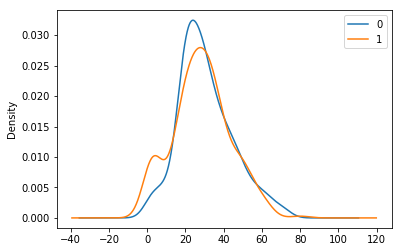

In [10]:
data.groupby('Survived')['Age'].plot(kind='kde',legend=True)

The figure shows that the survivor group seems have more children and less old people. But to be quantitative, first, we need to convert continuous group into three ordinal groups: children (age < 18), middle (age 18~50) and old (age > 50). Then calculate survival rate for each group.

In [11]:
data['Age_cat'] = pd.cut(data['Age'], [0, 18, 50, 80], labels=['children', 'middle',' old'])
data['Age_cat'] = data['Age_cat'].astype('object')

survival rates are:
 Age_cat
 old        0.343750
children    0.503597
middle      0.387476
Name: Survived, dtype: float64
p value is 0.026722118021544956 ,the difference is statistically significant


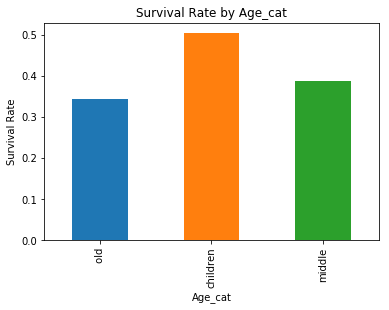

In [12]:
compare_survival_rate ('Age_cat')

According to the result, about half of children have survived. However, only 34.3% of old people and 38.7% of middle aged people survived. To test the significance, it is not enough to do a single Chi-square test. We need to split the original contingency table into two tables: children~middle and old~middle to test significance respectively.

In [13]:
crosstab = pd.crosstab(data['Survived'], data['Age_cat'])
crosstab_old = crosstab.iloc[:,[0,2]]
crosstab_children = crosstab.iloc[:,[1,2]]

In [14]:
test = stats.chi2_contingency(crosstab_children)
print('p value is', test[1])
if test[1] < 0.05:
    print('statistically significant')
else:
    print('not statistically significant')

p value is 0.017845634690218725
statistically significant


In [15]:
from scipy.stats import chi2_contingency

test = stats.chi2_contingency(crosstab_old)
print('p value is', test[1])
if test[1] < 0.05:
    print('statistically significant')
else:
    print('not statistically significant')

p value is 0.5877627142126838
not statistically significant


The conclusion is: In the sample which is not missing, the survival rate (50.4%) of children (age < 18)  is statistically significantly higher than that (38.7%) of middle aged people (age 18~50). But the survival rate (34.4%) of old people (age > 50)  is not statistically significantly different from that (38.7%) of middle aged people (age 18~50).

# Misssing values in age

One thing needs to be mentioned: there are many missing values of age. So we need to analyze the feature of these missing values to know whether they introduced biases to the results.

In [16]:
data.loc[pd.isna(data['Age']), 'Missing_age'] = 'missing'
data.loc[pd.notna(data['Age']), 'Missing_age'] = 'not missing'

In [17]:
data.groupby('Missing_age')['PassengerId'].count()

Missing_age
missing        177
not missing    714
Name: PassengerId, dtype: int64

Among all the 891 data points, 177 (19.9%) people's age records were missing. 

survival rates are:
 Missing_age
missing        0.293785
not missing    0.406162
Name: Survived, dtype: float64
p value is 0.007682742096212262 ,the difference is statistically significant


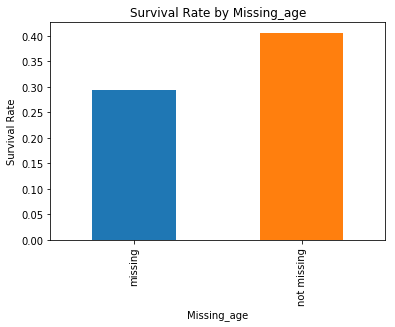

In [18]:
compare_survival_rate ('Missing_age')

The survival rate of 'missing aged people' is 29.4%, which is much lower than the 40.6% of 'not missing aged people'. This certainly introduced biaes to previous analysis. 

Another question will be: Why these records of age were missing? I defined a fuction to find the relationship between 'missing age' and other factors such as ticket class and sex.

In [19]:
def find_relationship (name):
    crosstab = pd.crosstab(data[name], data['Missing_age'])
    crosstab.plot(kind='pie',subplots = True, figsize = (10,5),autopct='%1.1f%%') 
    test = stats.chi2_contingency(crosstab)
    if test[1] < 0.05:
        print('p value is',test[1],',the difference is statistically significant')
    else:
        print('p value is',test[1],',the difference is not statistically significant')

p value is 9.945340263413207e-11 ,the difference is statistically significant


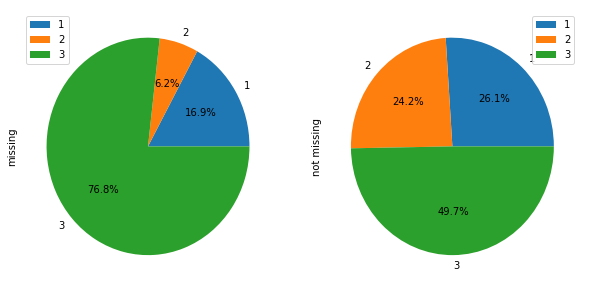

In [20]:
find_relationship('Pclass')

p value is 0.11869638287527425 ,the difference is not statistically significant


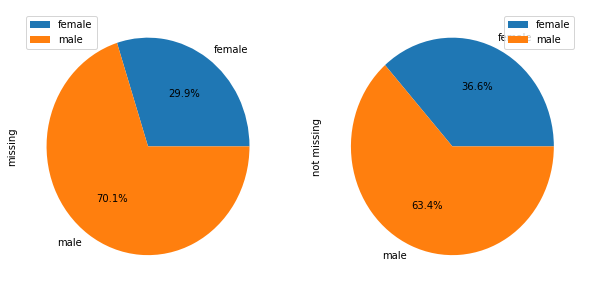

In [21]:
find_relationship('Sex')

In conclusion, the survival rate of 'missing aged people' is 29.4%, which is much lower than the 40.6% of 'not missing aged people'. This is probably because there were more 'missing aged people' in the 3rd class. This is probably not due to the sex difference between 'missing aged' and 'not missing aged' people. But no matter what is the true reason, this certainly introduced biases to previous analysis of age and survival rate.

# 4. Companionship

There are two columns in the dataset: One is 'SibSp', which means traveling with sibling or spouse. Another is 'Parch', which means traveling with parent or child. Does companionship promote survival rate? Which kind of companionship is better, Sibling/ Spouse or Parent/ Child?

First, we need to find out who traveled with and without relatives, and figure out survival rate for each group.

In [22]:
data['Accompanied'] = (data['SibSp'] != 0) | (data['Parch'] != 0)

survival rates are:
 Accompanied
False    0.303538
True     0.505650
Name: Survived, dtype: float64
p value is 1.9726543846517183e-09 ,the difference is statistically significant


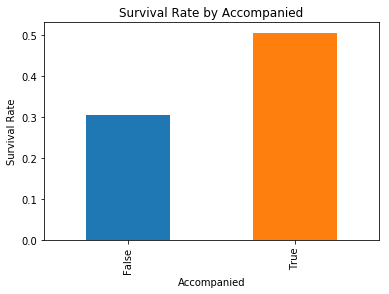

In [23]:
compare_survival_rate ('Accompanied')

From the result above, we know that people who traveled with relatives have much higher survival rate (50.6%) than that of those who traveled alone (30.4%). Then we need to find out which kind of companionship promote survival rate most.

In [24]:
data.loc[(data['SibSp'] == 0) & (data['Parch'] == 0), 'Companionship'] = 'Neither'
data.loc[(data['SibSp'] != 0) & (data['Parch'] == 0), 'Companionship'] = 'Sibling/ Spouse'
data.loc[(data['SibSp'] == 0) & (data['Parch'] != 0), 'Companionship'] = 'Parent/ Child'
data.loc[(data['SibSp'] != 0) & (data['Parch'] != 0), 'Companionship'] = 'Both'

survival rates are:
 Companionship
Both               0.436620
Neither            0.303538
Parent/ Child      0.661972
Sibling/ Spouse    0.496454
Name: Survived, dtype: float64
p value is 3.3135083695001796e-10 ,the difference is statistically significant


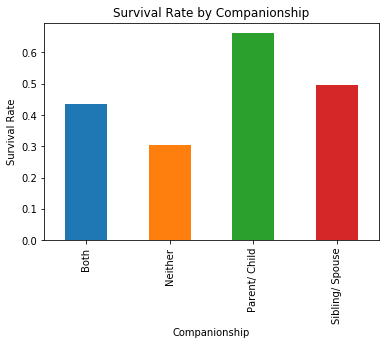

In [25]:
compare_survival_rate ('Companionship')

We can see that all the companionship: only Parent/ Child, only Sibling/ Spouse and both (Sibling/ Spouse and Parent/ Child) can increase survival rate, compared to those who traveled without relatives (Neither). Among them, Parent/ Child relationship is the best promoter, which increases survival rate from 30.4% (Neither) to 66.2%. 

# 5. Port of Embarkation

It seems that port of embarkation cannot affect the survival rate. But let's explore it.

In [26]:
data.loc[data['Embarked'] == 'C', 'Embarked'] = 'Cherbourg'
data.loc[data['Embarked'] == 'Q', 'Embarked'] = 'Queenstown'
data.loc[data['Embarked'] == 'S', 'Embarked'] = 'Southampton'

survival rates are:
 Embarked
Cherbourg      0.553571
Queenstown     0.389610
Southampton    0.336957
Name: Survived, dtype: float64
p value is 1.769922284120912e-06 ,the difference is statistically significant


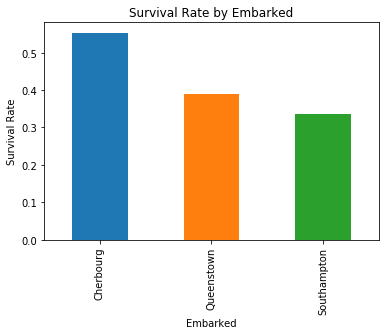

In [27]:
compare_survival_rate ('Embarked')

The result shows that people who embarked in Cherbourg have the highest survival rate (55.4%), while people who embarked in Southampton have lowest survival rate (33.7%). This result seems make no sense, because it is hard to find appropriate reasons to explain this. Under this circumstance, we need to consider the effect of confounders.

There many possible confounders: ticket class, sex, age and companionship. Let's find them one by one:

5.1 Ticket class

In [28]:
def find_confounders (name):
    crosstab = pd.crosstab(data[name], data['Embarked'])
    crosstab.plot(kind='pie',subplots = True, figsize = (15,5),autopct='%1.1f%%')
    plt.title('Distribution of ' + name + ' of Three Port of Embarkation') 
    test = stats.chi2_contingency(crosstab)
    if test[1] < 0.05:
        print('p value is',test[1],',the difference is statistically significant')
    else:
        print('p value is',test[1],',the difference is not statistically significant')

p value is 8.435267819894384e-26 ,the difference is statistically significant


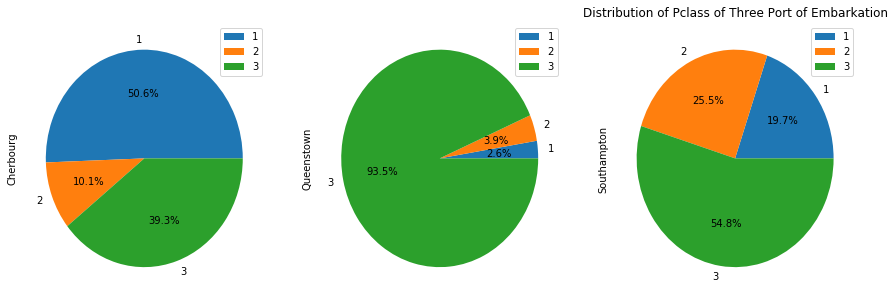

In [29]:
find_confounders ('Pclass')

As we can see, there are about half of 'Cherbourgers' (people who embarked in Cherbourg, the same below) held first class tickets. But only 2.6% of 'Queenstowners' and 19.7% of 'Southamptoners' held the first class tickets. Ticket class may be a confounder.

5.2 Sex

p value is 0.0012585245232290144 ,the difference is statistically significant


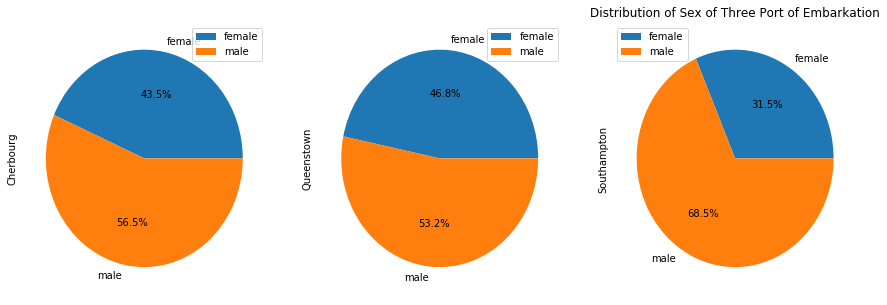

In [30]:
find_confounders ('Sex')

There are 43.5% of 'Cherbourgers' were females. While only 31.5% of 'Southamptoners' were females. Sex may be a confounder.

5.3 Age

p value is 0.37025414777529986 ,the difference is not statistically significant


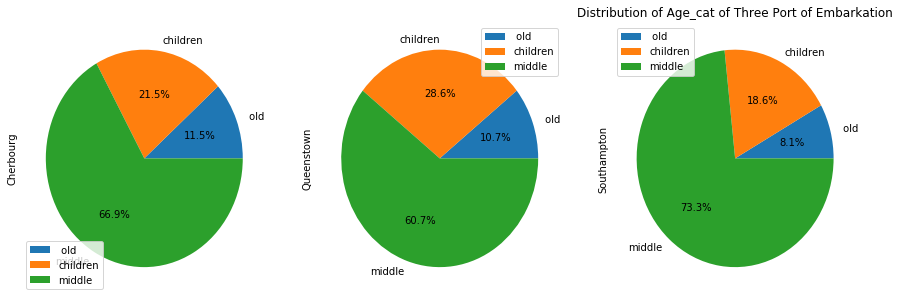

In [31]:
find_confounders ('Age_cat')

There are 21.5% of 'Cherbourgers' and 18.6% of 'Southamptoners' were children. But the difference is not significant (p = 0.370 > 0.05). So age may not be a confounder.

5.4 Companionship

In [32]:
cross_com_em = pd.crosstab(data['Accompanied'], data['Embarked'])

p value is 0.0016679256151052018 ,the difference is statistically significant


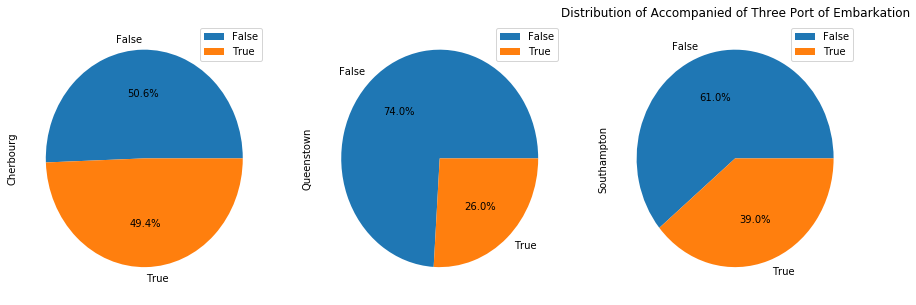

In [33]:
find_confounders ('Accompanied')

There are 49.4% of 'Cherbourgers' (people who embarked in Cherbourg, the same below) traveled with relatives, but only 39.0% of 'Southamptoners' chose not travel alone.Companionship may be a confounder.

From the analysis above, we can draw this conclusion: In the sample, people who embarked in Cherbourg have the highest survival rate (55.4%). This is probably because among these people, there are more people in 1st class, more females and more people accompanied by their relatives. And 1st class ticket holders, females and people accompanied have higher survival rate.

# 6. Conclusion

The final conclusion is: In the sample, those who were in higher classes (1st > 2nd > 3rd), females, children (age < 18), and accompanied by their relatives (sibling/spouse or parent/child or both) had higher survival rate. The sample size is 889. According to Wikipedia, there were estimated 2,224 passengers and crew aboard. Only 40% of people were included in the sample. I don't know how the sampling happened. So I don't know whether there are biases in sampling. Besides, there were about 908 crews on Titanic, which were not included in the sample either. In a word, because of limited information on sampling, I cannot generalize the result to all the people on Titanic.